In [25]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

In [26]:
df = pd.read_csv("iris.data", names=['longitud sepalo','ancho sepalo','longitud petalo','ancho petalo','especie'])
df

,longitud sepalo,ancho sepalo,longitud petalo,ancho petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
#contador de especies
df = df.dropna()
df.especie.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: especie, dtype: int64

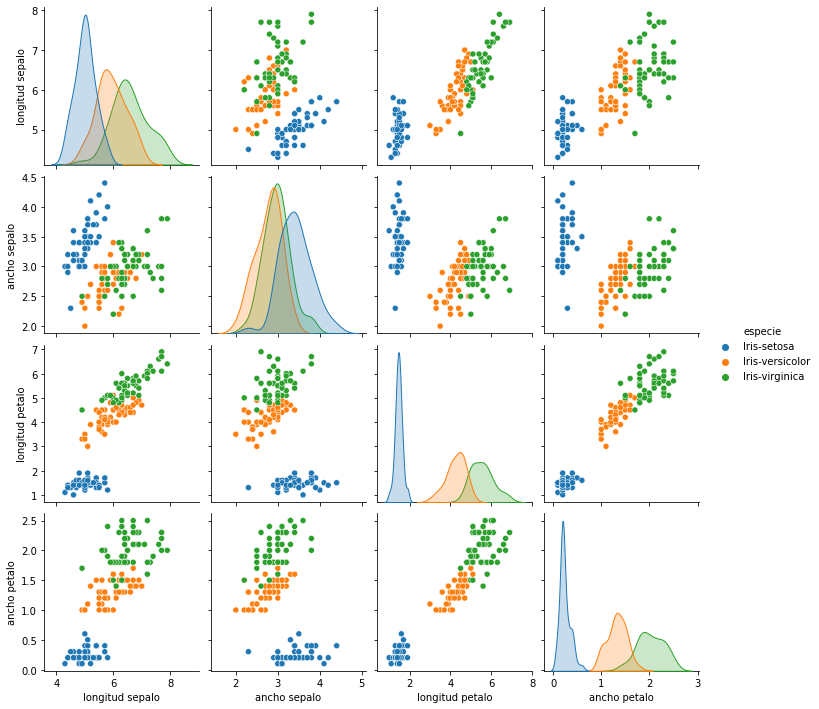

In [28]:
#relacion de los datos
sns.pairplot(df, hue='especie')

In [29]:
#instanciar umap
reducer = umap.UMAP()
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas
X = df.iloc[:,0:4].values
#convertir cada característica en número de desviaciones estándar de la media para la comparabilidad.
scaled_iris_data = StandardScaler().fit_transform(X)
#el fit_transform método primero llama fit(datos para aprender) 
#y luego devuelve los datos transformados como una matriz numpy.
embedding = reducer.fit_transform(scaled_iris_data)
embedding.shape

(150, 2)

Text(0.5, 1.0, 'UMAP projection of the iris dataset')

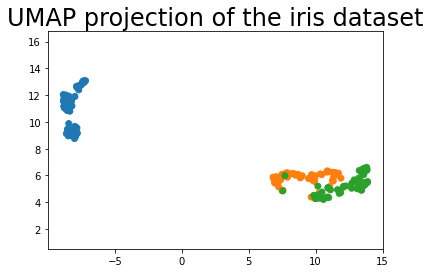

In [30]:
#de forma predeterminada, UMAP se reduce a 2D 
#Cada fila de la matriz es una representación bidimensional de la flor correspondiente. 
#Por lo tanto, se puede trazar embedding como un diagrama de dispersión estándar 
#y colorear por la matriz de destino 
#(ya que se aplica a los datos transformados que están en el mismo orden que el original).
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.especie.map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the iris dataset', fontsize=24)